This notebook will compare the abundance from Multinet, Tucker Trawl and Pelagic Trawl from the 2018 Sea Patches cruise in trosøflaket

In [16]:
%matplotlib inline
import numpy as np
import pandas as pd
from netCDF4 import Dataset

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cartopy.crs as ccrs
import cartopy
import sb_tools
import seaborn as sns

In [17]:
sns.set_theme(style="darkgrid")
sns.color_palette("viridis", as_cmap=True)
sns.set(rc={'figure.figsize':(11.7,8.27)})
title_font = {
    'fontname': 'DejaVu Sans', 'size': '15', 'color': 'black',
    'weight': 'medium'
}
axis_font = {'fontname': 'DejaVu Sans', 'size': '15', 'color': 'black'}

## MultiNetTrawl
Hydrobios Multinet (0.25 m2) with mesh size 180 μm. Samples were taken from 5 depth strata. I will only use depth 0, 5 and 10 and 30 m. Unfortunately at station 7 the multinet did not close.

In [18]:
Multinet_df = pd.read_excel('C:/Users/mbd/OneDrive - Akvaplan-niva AS/PhD-APN/ChaptersandExperiments/Tromsøflaket/SP_Multinet.xlsx',header=0, index_col=0)
Multinet_df['Trawl'] = 'Multinet'
Multinet_df['Species'] = Multinet_df.index

In [19]:
Multinet_df

,Station 7,Station 8,Station 9,Station 10,Station 11,Station 12,Station 13,Station 14,Station 15,Station 16,Station 17,Trawl,Species
Calanus,0.968525,0.967915,0.964796,0.986873,0.935887,0.944438,0.849436,0.966078,0.899910,0.989963,0.912676,Multinet,Calanus
Krill,0.009657,0.001062,0.003764,0.001212,0.002663,0.005152,0.003071,0.002735,0.004778,0.000894,0.003895,Multinet,Krill
Amphipod,0.000000,0.000240,0.000759,0.000957,0.000683,0.000561,0.000215,0.000251,0.000808,0.000166,0.000000,Multinet,Amphipod
Limacina,0.013234,0.019386,0.012054,0.003259,0.015716,0.029295,0.137395,0.014021,0.054246,0.005177,0.005259,Multinet,Limacina
Gelatinous,0.004113,0.007390,0.012874,0.005200,0.041239,0.018544,0.008662,0.012838,0.035735,0.003775,0.063983,Multinet,Gelatinous
Fish Larvae,0.000000,0.000129,0.000275,0.000045,0.000089,0.000013,0.000030,0.000000,0.000000,0.000000,0.000000,Multinet,Fish Larvae
Other,0.004471,0.003879,0.005479,0.002455,0.003724,0.001998,0.001191,0.004077,0.004523,0.000025,0.014187,Multinet,Other
Cod,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Multinet,Cod
Capelin,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Multinet,Capelin
Haddock,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Multinet,Haddock


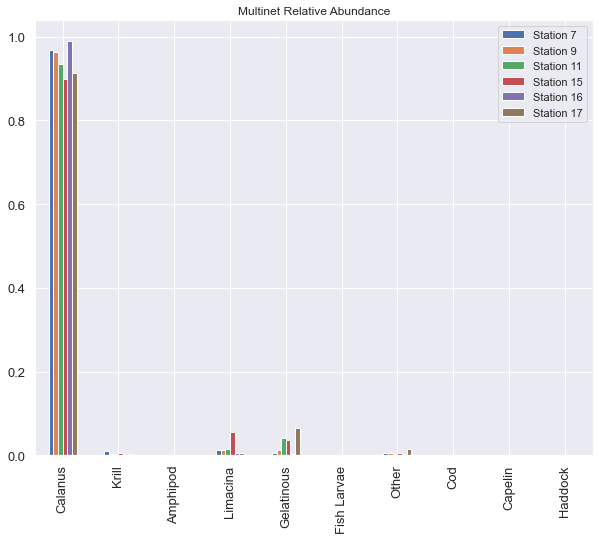

In [20]:
stn = [7,11,15,16,17]
Multinet_df[['Station 7','Station 9','Station 11','Station 15', 'Station 16', 'Station 17']].plot.bar(figsize=(10,8), fontsize=13, title='Multinet Relative Abundance')


## Tucker Trawl data from selected stations
Tucket trawl 1000 μm mesh. The net was trawled for 15 min at 2 kn.
The depth of the tow varies with the station
Station 7 at 25 m
Station 11 at 30 m
Station 15 at 30 m
Station 16 at 20 m
Station 17 at 20 m

These depths at approx. in the middle of the Sailbuoy WBT mini 333 kHz range.

In [21]:
Tucker_df = pd.read_excel('C:/Users/mbd/OneDrive - Akvaplan-niva AS/PhD-APN/ChaptersandExperiments/Tromsøflaket/SP_Tucker.xlsx',header=0, index_col=0)
Tucker_df['Trawl']='Tucker'
Tucker_df['Species'] =Tucker_df.index

In [22]:
Tucker_df

,Station 2,Station 3,Station 4,Station 5,Station 6,Station 7,Station 8,Station 9,Station 10,Station 11,Station 12,Station 13,Station 14,Station 15,Station 16,Station 17,Station 18,Trawl,Species
Calanus,0.632066,0.341304,0.085599,0.718644,0.44375,0.651203,0.301282,0.758065,0.833784,0.584046,0.447552,0.729875,0.430341,0.451613,0.547231,0.253968,0.754325,Tucker,Calanus
Krill,0.050360,0.164493,0.005539,0.037288,0.05875,0.111684,0.057692,0.067204,0.066216,0.113960,0.111888,0.107335,0.151703,0.146628,0.210098,0.517460,0.197232,Tucker,Krill
Amphipod,0.008222,0.015942,0.007553,0.035593,0.00375,0.017182,0.042735,0.061828,0.020270,0.071225,0.055944,0.046512,0.049536,0.170088,0.027687,0.057143,0.000000,Tucker,Amphipod
Limacina,0.307297,0.389855,0.886707,0.196610,0.48250,0.134021,0.495726,0.029570,0.043243,0.182336,0.332168,0.069767,0.179567,0.129032,0.182410,0.088889,0.006920,Tucker,Limacina
Gelatinous,0.001028,0.012319,0.010070,0.008475,0.00500,0.003436,0.000000,0.000000,0.000000,0.005698,0.003497,0.000000,0.003096,0.020528,0.019544,0.038095,0.000000,Tucker,Gelatinous
Fish Larvae,0.000000,0.009420,0.002014,0.003390,0.00500,0.024055,0.004274,0.010753,0.001351,0.005698,0.010490,0.010733,0.006192,0.008798,0.008143,0.012698,0.003460,Tucker,Fish Larvae
Other,0.001028,0.066667,0.002518,0.000000,0.00125,0.058419,0.098291,0.072581,0.035135,0.037037,0.038462,0.035778,0.179567,0.073314,0.004886,0.031746,0.038062,Tucker,Other
Cod,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Tucker,Cod
Capelin,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Tucker,Capelin
Haddock,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Tucker,Haddock


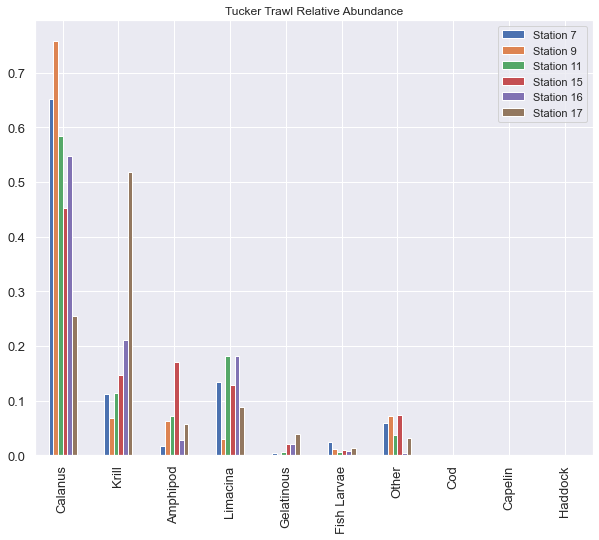

In [23]:
stn = [7,11,15,16,17]
trawl_depth = [25,30,30,20,20]
Tucker_df[['Station 7','Station 9','Station 11','Station 15', 'Station 16', 'Station 17']].plot.bar(figsize=(10,8), fontsize=13, title='Tucker Trawl Relative Abundance')

Most stations have =>45% of Calanus and ~ 20% Krill. Station 17 has the opposite abundance with more Krill (51%) than Calanus (25%).

## Harstad pelagic Trawl

Harstad trawl with 8mm mesh size was deployed 11 times. Each deployment lasted between 20 and 40 minutes and the trawl depth was decided based on the
at a depth of 40-60. Station 15 was at 240 m, we will discard these values for the epipelagic study here. Depth was chosen based on mstrongest backscattering layer.

In [24]:
Harstad_df = pd.read_excel('C:/Users/mbd/OneDrive - Akvaplan-niva AS/PhD-APN/ChaptersandExperiments/Tromsøflaket/SP_HarstadTrawl.xlsx',header=0, index_col=0)
Harstad_df['Trawl']='Pelagic'
Harstad_df['Species'] = Harstad_df.index

In [25]:
Harstad_df

,Station 3,Station 7,Station 8,Station 9,Station 10,Station 12,Station 13,Station 15,Station 16,Station 17,Station 18,Trawl,Species
Calanus,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,Pelagic,Calanus
Krill,0.000000,0.010428,0.175610,0.604651,0.946368,0.109827,0.033472,0.93121,0.897474,0.428571,0.000000,Pelagic,Krill
Amphipod,0.000000,0.001450,0.000000,0.052326,0.037339,0.101156,0.000000,0.00000,0.000000,0.000000,0.000000,Pelagic,Amphipod
Limacina,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,Pelagic,Limacina
Gelatinous,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,Pelagic,Gelatinous
Fish Larvae,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,Pelagic,Fish Larvae
Other,0.000000,0.000414,0.000000,0.000000,0.000000,0.011561,0.000887,0.06879,0.000000,0.000000,0.000000,Pelagic,Other
Cod,0.270270,0.771141,0.261789,0.081395,0.004752,0.713873,0.286783,0.00000,0.002972,0.571429,0.718487,Pelagic,Cod
Capelin,0.716216,0.216566,0.523577,0.122093,0.008147,0.011561,0.677805,0.00000,0.000000,0.000000,0.281513,Pelagic,Capelin
Haddock,0.013514,0.000000,0.039024,0.139535,0.003394,0.052023,0.001053,0.00000,0.099554,0.000000,0.000000,Pelagic,Haddock


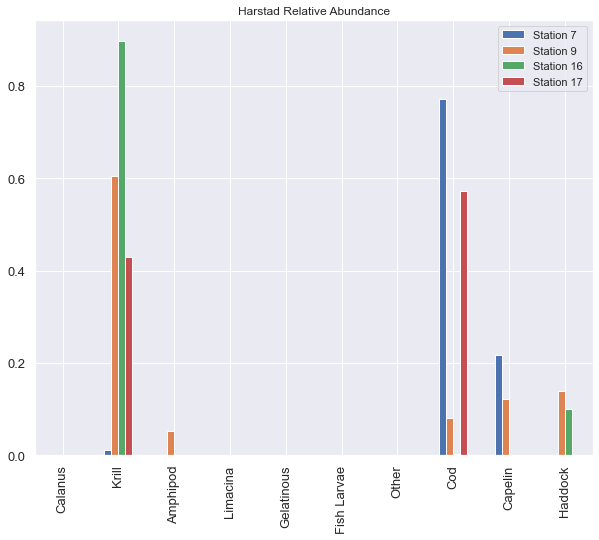

In [26]:
Harstad_df[['Station 7','Station 9', 'Station 16', 'Station 17']].plot.bar(figsize=(10,8), fontsize=13, title='Harstad Relative Abundance')

# Plot to compare per station

In [27]:
Trawl_df = pd.concat([Harstad_df,Multinet_df,Tucker_df])
Trawl_df.groupby(['Species','Trawl']).mean()


Station 3  Station 7  Station 8  Station 9  Station 10  \
Species     Trawl                                                              
Amphipod    Multinet        NaN   0.000000   0.000240   0.000759    0.000957   
            Pelagic    0.000000   0.001450   0.000000   0.052326    0.037339   
            Tucker     0.015942   0.017182   0.042735   0.061828    0.020270   
Calanus     Multinet        NaN   0.968525   0.967915   0.964796    0.986873   
            Pelagic    0.000000   0.000000   0.000000   0.000000    0.000000   
            Tucker     0.341304   0.651203   0.301282   0.758065    0.833784   
Capelin     Multinet        NaN   0.000000   0.000000   0.000000    0.000000   
            Pelagic    0.716216   0.216566   0.523577   0.122093    0.008147   
            Tucker     0.000000   0.000000   0.000000   0.000000    0.000000   
Cod         Multinet        NaN   0.000000   0.000000   0.000000    0.000000   
            Pelagic    0.270270   0.771141   0.261789   0.081395    0.004752   
            Tucker     0.000000   0.000000   0.000000   0.000000    0.000000   
Fish Larvae Multinet        NaN   0.000000   0.000129   0.000275    0.000045   
            Pelagic    0.000000   0.000000   0.000000   0.000000    0.000000   
            Tucker     0.009420   0.024055   0.004274   0.010753    0.001351   
Gelatinous  Multinet        NaN   0.004113   0.007390   0.012874    0.005200   
            Pelagic    0.000000   0.000000   0.000000   0.000000    0.000000   
            Tucker     0.012319   0.003436   0.000000   0.000000    0.000000   
Haddock     Multinet        NaN   0.000000   0.000000   0.000000    0.000000   
            Pelagic    0.013514   0.000000   0.039024   0.139535    0.003394   
            Tucker     0.000000   0.000000   0.000000   0.000000    0.000000   
Krill       Multinet        NaN   0.009657   0.001062   0.003764    0.001212   
            Pelagic    0.000000   0.010428   0.175610   0.604651    0.946368   
            Tucker     0.164493   0.111684   0.057692   0.067204    0.066216   
Limacina    Multinet        NaN   0.013234   0.019386   0.012054    0.003259   
            Pelagic    0.000000   0.000000   0.000000   0.000000    0.000000   
            Tucker     0.389855   0.134021   0.495726   0.029570    0.043243   
Other       Multinet        NaN   0.004471   0.003879   0.005479    0.002455   
            Pelagic    0.000000   0.000414   0.000000   0.000000    0.000000   
            Tucker     0.066667   0.058419   0.098291   0.072581    0.035135   

                      Station 12  Station 13  Station 15  Station 16  \
Species     Trawl                                                      
Amphipod    Multinet    0.000561    0.000215    0.000808    0.000166   
            Pelagic     0.101156    0.000000    0.000000    0.000000   
            Tucker      0.055944    0.046512    0.170088    0.027687   
Calanus     Multinet    0.944438    0.849436    0.899910    0.989963   
            Pelagic     0.000000    0.000000    0.000000    0.000000   
            Tucker      0.447552    0.729875    0.451613    0.547231   
Capelin     Multinet    0.000000    0.000000    0.000000    0.000000   
            Pelagic     0.011561    0.677805    0.000000    0.000000   
            Tucker      0.000000    0.000000    0.000000    0.000000   
Cod         Multinet    0.000000    0.000000    0.000000    0.000000   
            Pelagic     0.713873    0.286783    0.000000    0.002972   
            Tucker      0.000000    0.000000    0.000000    0.000000   
Fish Larvae Multinet    0.000013    0.000030    0.000000    0.000000   
            Pelagic     0.000000    0.000000    0.000000    0.000000   
            Tucker      0.010490    0.010733    0.008798    0.008143   
Gelatinous  Multinet    0.018544    0.008662    0.035735    0.003775   
            Pelagic     0.000000    0.000000    0.000000    0.000000   
            Tucker      0.003497    0.000000    0.020528    0.019544   
Haddock     Multinet 

### Station 7

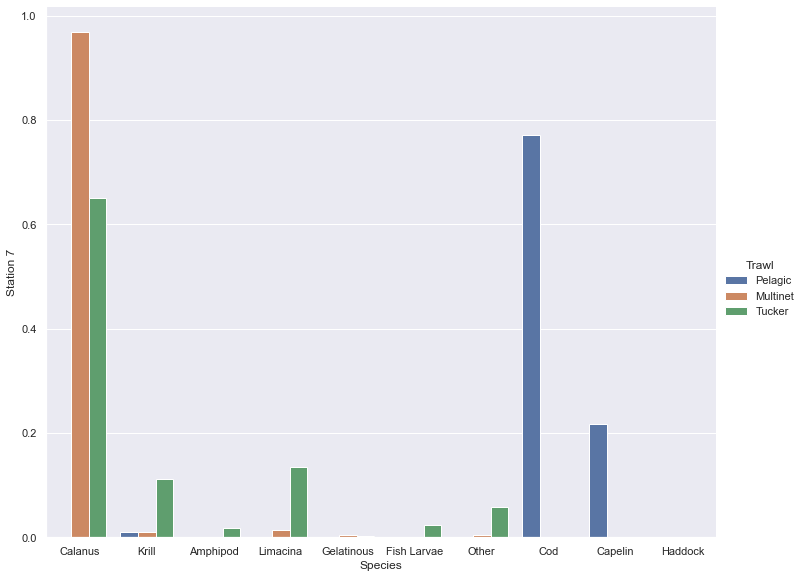

In [28]:
stn = 'Station 7'

sns.catplot(data=Trawl_df, x='Species', y=stn, hue='Trawl', kind="bar", height=8, aspect=10/8)

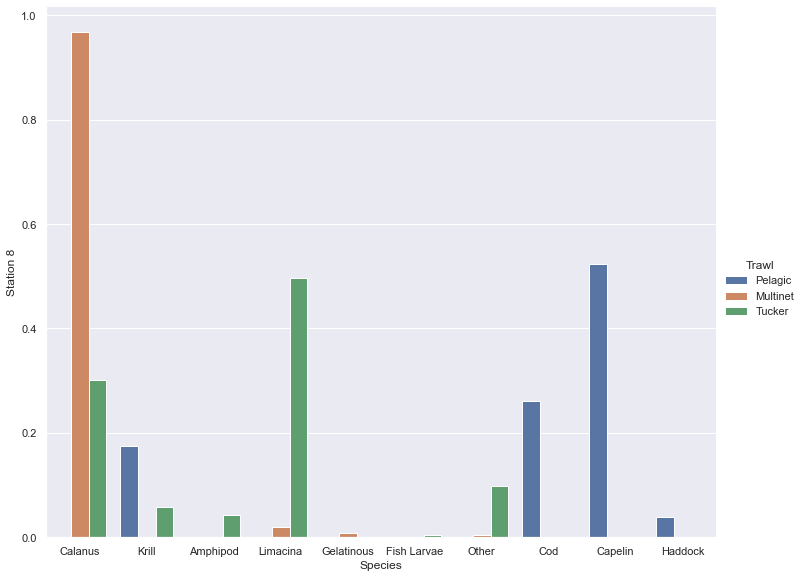

In [14]:
stn = 'Station 8'

sns.catplot(data=Trawl_df, x='Species', y=stn, hue='Trawl', kind="bar", height=8, aspect=10/8)

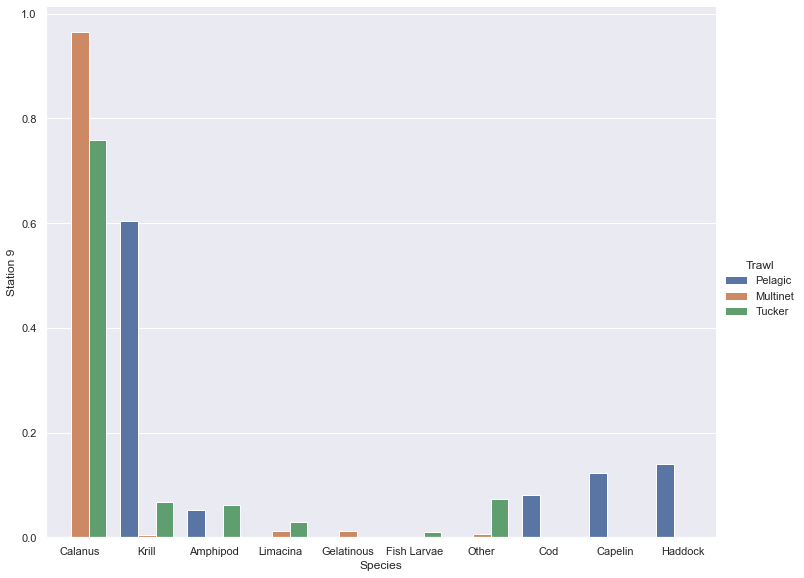

In [15]:
stn = 'Station 9'

sns.catplot(data=Trawl_df, x='Species', y=stn, hue='Trawl', kind="bar", height=8, aspect=10/8)

In [33]:
Tucker_df[stn]

Calanus        0.253968
Krill          0.517460
Amphipod       0.057143
Limacina       0.088889
Gelatinous     0.038095
Fish Larvae    0.012698
Other          0.031746
Cod            0.000000
Capelin        0.000000
Haddock        0.000000
Name: Station 17, dtype: float64